# Title of Project :-  Big Sales Prediction using RandomForest Regressor

## **Objective**

There are 12 variables in dataset.

1.  Item_Identifier
2.  Item_Weight
3.  Item_Fat_Content
4.  Item_Visibility
5.  Item_Type
6.  Item_MPR
7.  Outlet_Identifier
8.  Outlet_Establishment_Year
9.  Outlet_Size
10. Outlet_Location_Type
11. Outlet_Type
12. Item_Outlet_Sales


The objective of this project is to predict big sales on the basis of independent variables using RandomForestRegresor Algorithms

## **Data Source**

https://github.com/YBI-Foundation/Dataset/blob/main/Big%20Sales%20Data.csv

## **Import Library**

In [2]:
import pandas as pd # for data import and manipulation
import seaborn as sns # for visualization
from sklearn.preprocessing import LabelEncoder, StandardScaler # for preprocessing
from sklearn.model_selection import train_test_split # for train test split the data
from sklearn.ensemble import RandomForestRegressor # for train data and predict the data
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error # for checking accuracy of model

## **Import Data**

In [9]:
data = pd.read_csv("Big Sales Data.csv")
data


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDG47,12.8,Low Fat,0.069606,Starchy Foods,261.9252,OUT035,2004,Small,Tier 2,Supermarket Type1,4984.178800
14200,FDG47,12.8,Low Fat,0.070013,Starchy Foods,262.8252,OUT017,2007,Medium,Tier 2,Supermarket Type1,2885.577200
14201,FDG47,12.8,Low Fat,0.069561,Starchy Foods,263.0252,OUT013,1987,High,Tier 3,Supermarket Type1,2885.577200
14202,FDG47,NaN,Low Fat,0.069282,Starchy Foods,263.5252,OUT027,1985,Medium,Tier 3,Supermarket Type3,3803.676434


## **Describe Data**

In [3]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


## **Data Preprocessing**

In [5]:
le = LabelEncoder() # Object create for preprocessing 

In [6]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2389
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
data['Item_Weight'].fillna(data.groupby(['Item_Type'])['Item_Weight'].transform('mean'), inplace = True)

In [8]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [9]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

In [10]:
data.replace({'Item_Fat_Content' : {'LF' : 'Low Fat', 'reg' : 'Regular', 'low fat' : 'Low Fat'}}, inplace =True)

In [11]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

In [12]:
data['Item_Fat_Content'] = le.fit_transform(data['Item_Fat_Content'])

In [13]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
0    9185
1    5019
Name: count, dtype: int64

In [14]:
data['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64

In [15]:
data.replace({'Item_Type' : {'Fruits and Vegetables' : 0 , 'Snack Foods' : 0, 'Frozen Foods' : 0, 'Dairy' : 0, 'Baking Goods' : 0, 'Canned' : 0, 'Meat' : 0, 'Soft Drinks' : 0, 'Breads' : 0, 'Hard Drinks' : 0, 'Starchy Foods' : 0, 'Breakfast' : 0, 'Seafood' : 0, 
                               'Household' : 1, 'Health and Hygiene' : 1, 
                               'Others' : 2 }}, inplace = True)

In [16]:
data['Item_Type'].value_counts()

Item_Type
0    11518
1     2406
2      280
Name: count, dtype: int64

In [17]:
data['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: count, dtype: int64

In [18]:
data['Outlet_Identifier'] = le.fit_transform(data['Outlet_Identifier'])

In [19]:
data['Outlet_Identifier'].value_counts()

Outlet_Identifier
5    1559
1    1553
9    1550
8    1550
6    1550
7    1548
3    1546
2    1543
0     925
4     880
Name: count, dtype: int64

In [20]:
data['Outlet_Size'].value_counts()

Outlet_Size
Medium    7122
Small     5529
High      1553
Name: count, dtype: int64

In [21]:
data['Outlet_Size'] = le.fit_transform(data['Outlet_Size'])

In [22]:
data['Outlet_Size'].value_counts()

Outlet_Size
1    7122
2    5529
0    1553
Name: count, dtype: int64

In [23]:
data['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: count, dtype: int64

In [24]:
data['Outlet_Location_Type'] = le.fit_transform(data['Outlet_Location_Type'])

In [25]:
data['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
2    5583
1    4641
0    3980
Name: count, dtype: int64

In [26]:
data['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: count, dtype: int64

In [27]:
data['Outlet_Type'] = le.fit_transform(data['Outlet_Type'])

In [28]:
data['Outlet_Type'].value_counts()

Outlet_Type
1    9294
0    1805
3    1559
2    1546
Name: count, dtype: int64

In [29]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,0,0.111448,0,33.4874,9,1999,1,0,1,436.608721
1,FDT36,12.3,0,0.111904,0,33.9874,2,2007,1,1,1,443.127721
2,FDT36,12.3,0,0.111728,0,33.9874,3,2009,1,2,2,564.598400
3,FDT36,12.3,0,0.000000,0,34.3874,4,1985,2,0,0,1719.370000
4,FDP12,9.8,1,0.045523,0,35.0874,2,2007,1,1,1,352.874000


## **Data Visualization**

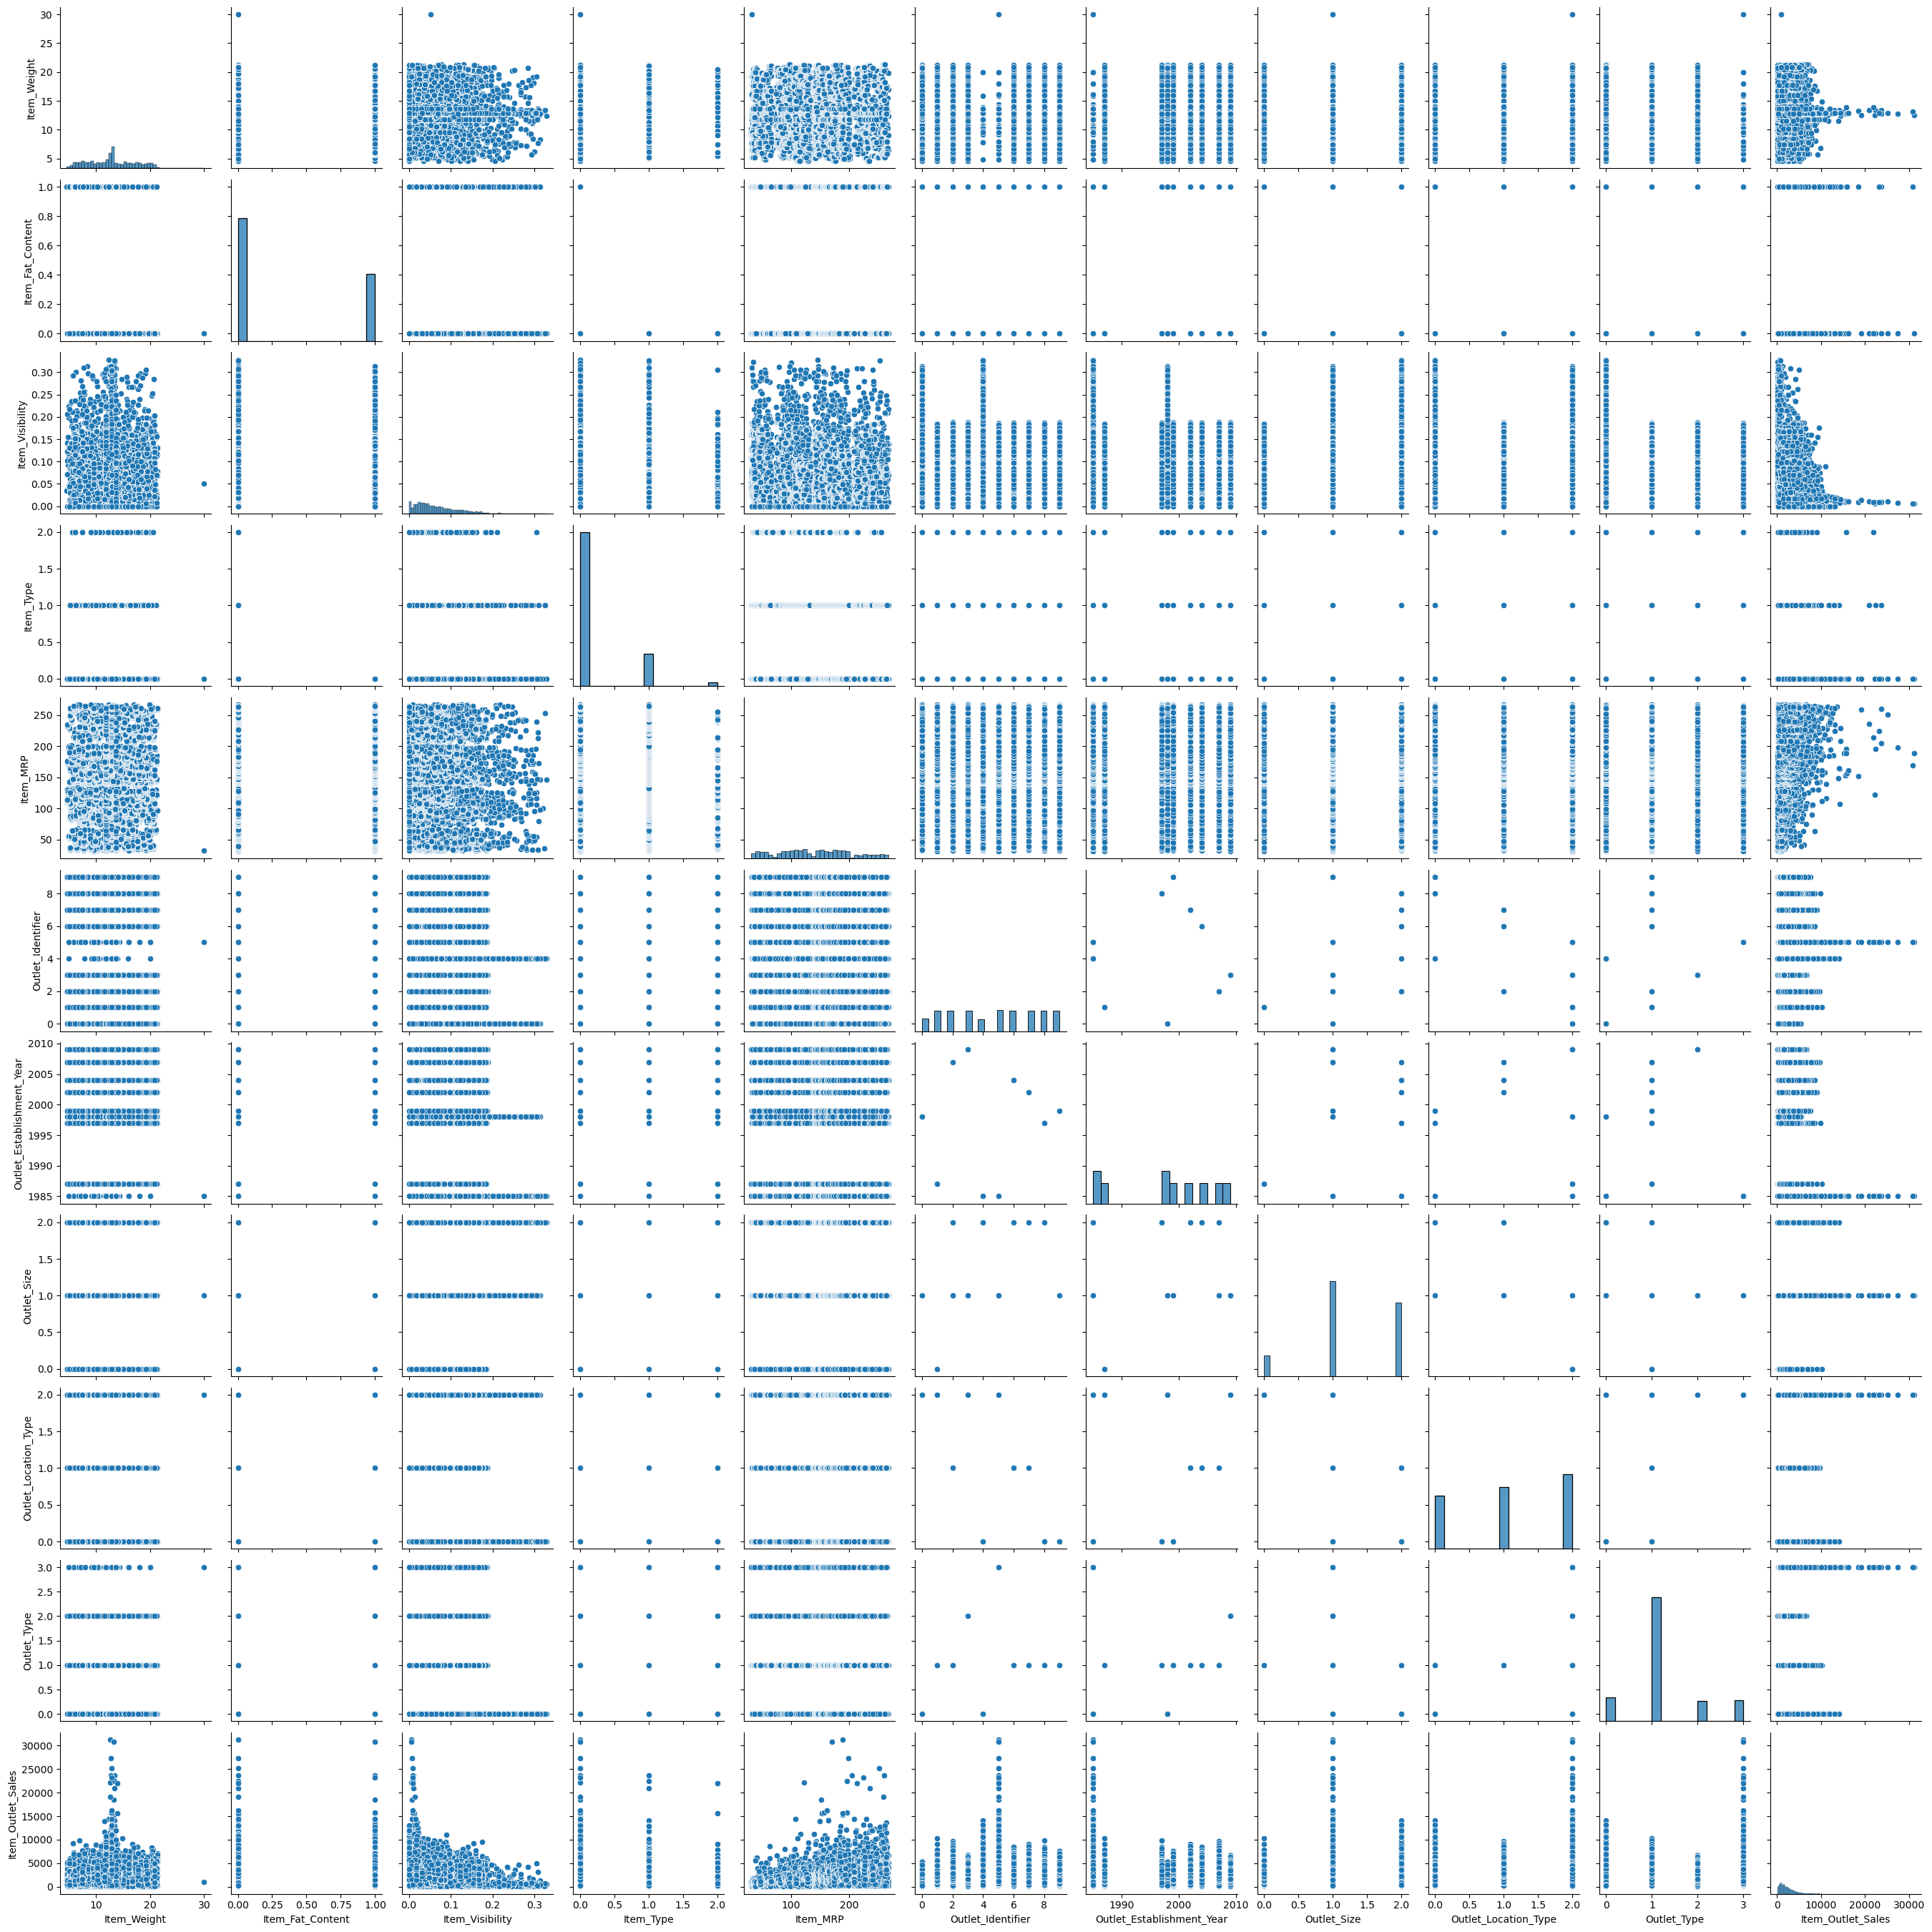

In [30]:
sns.pairplot(data)

## **Define Target Variable (y) and Feature Variables (X)**

In [31]:
y = data['Item_Outlet_Sales']

In [32]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [33]:
x = data.drop(['Item_Identifier', 'Item_Outlet_Sales'], axis=1)

# Get X Variables Standardized

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn, they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zaro mean and unit variance.

In [34]:
sc = StandardScaler()

In [35]:
x_std = data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]

In [36]:
x_std = sc.fit_transform(x_std)

In [37]:
x_std

array([[-0.11541705,  0.88413635, -1.73178716,  0.13968068],
       [-0.11541705,  0.89300616, -1.72373366,  1.09531886],
       [-0.11541705,  0.88958331, -1.72373366,  1.3342284 ],
       ...,
       [ 0.00220132,  0.07011952,  1.96538148, -1.29377659],
       [ 0.20444792,  0.06469366,  1.97343499, -1.53268614],
       [ 0.00220132,  0.07334891,  1.97504569,  0.13968068]])

In [41]:
x[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']] = pd.DataFrame(x_std, columns = [['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']])

In [43]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.115417,0,0.884136,0,-1.731787,9,0.139681,1,0,1
1,-0.115417,0,0.893006,0,-1.723734,2,1.095319,1,1,1
2,-0.115417,0,0.889583,0,-1.723734,3,1.334228,1,2,2
3,-0.115417,0,-1.281712,0,-1.717291,4,-1.532686,2,0,0
4,-0.703509,1,-0.397031,0,-1.706016,2,1.095319,1,1,1


## **Train Test Split**

In [62]:
# train test split

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, random_state = 7)

In [55]:
x_train.shape, x_test.shape

((11363, 10), (2841, 10))

In [56]:
y_train.shape, y_test.shape

((11363,), (2841,))

## **Modeling**

In [65]:
model = RandomForestRegressor()

## **Model Evaluation**

In [66]:
model.fit(x_train, y_train)

RandomForestRegressor()

## **Prediction**

In [67]:
pred = model.predict(x_test)

## **Model Accuracy**

In [68]:
r2_score(y_test, pred)

0.5414183274927591

# Get Visualization of Actual Vs Predicted Results

In [69]:
import matplotlib.pyplot as plt

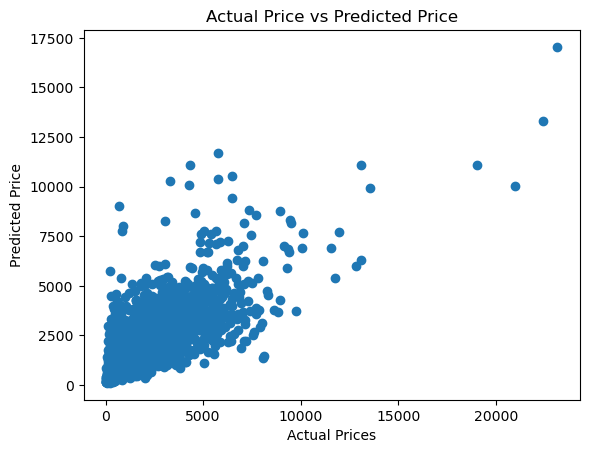

In [71]:
plt.scatter(y_test, pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()